In [85]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style("whitegrid")
import warnings 
warnings.filterwarnings('ignore')
import calendar

In [96]:
df = pd.read_csv('ign.csv')
df.drop(labels= 'Unnamed: 0', axis=1, inplace=True)
df.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score_phrase    18625 non-null  object 
 1   title           18625 non-null  object 
 2   url             18625 non-null  object 
 3   platform        18625 non-null  object 
 4   score           18625 non-null  float64
 5   genre           18589 non-null  object 
 6   editors_choice  18625 non-null  object 
 7   release_year    18625 non-null  int64  
 8   release_month   18625 non-null  int64  
 9   release_day     18625 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.4+ MB


In [108]:
df.isnull().sum()

score_phrase           0
title                  0
url                    0
platform               0
score                  0
genre                 36
editors_choice         0
release_year           0
release_month          0
release_day            0
editors_choice_num     0
dtype: int64

### Distribution of scores:

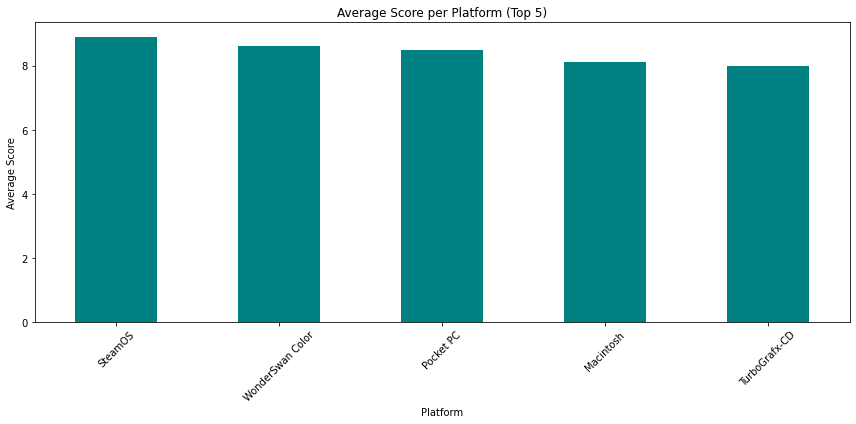

In [98]:
platform_scores = df.groupby('platform')['score'].mean().sort_values(ascending=False).head(5)

platform_scores.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Average Score per Platform (Top 5)')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Variation in scores over the years

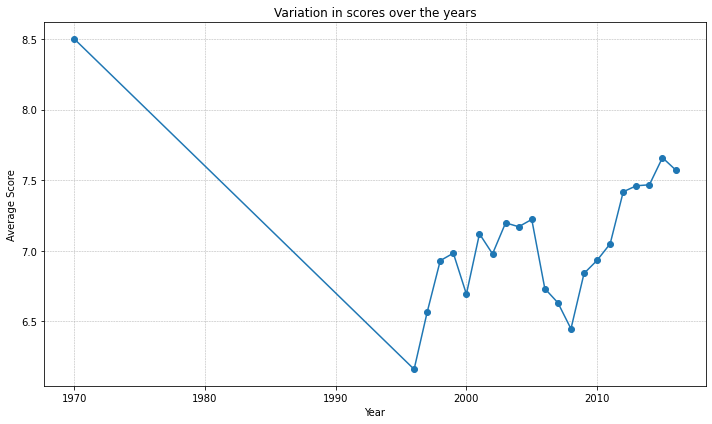

In [99]:
# Filtrando os dados até o ano de 2016
filtered_data = df[df['release_year'] <= 2016]

# Calculando a média de pontuação por ano até 2016
yearly_scores = filtered_data.groupby('release_year')['score'].mean()

# Plotando o gráfico com um tamanho maior (por exemplo, 10x6 polegadas)
plt.figure(figsize=(10, 6))
yearly_scores.plot(kind='line', marker='o')
plt.title('Variation in scores over the years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Average Score by Gender

In [100]:
df['editors_choice_num'] = df['editors_choice'].map({'Y': 1, 'N': 0})
correlation = df['editors_choice_num'].corr(df['score'])
print(f'The correlation between the choice of editor and the score is {correlation:.2f}')

The correlation between the choice of editor and the score is 0.54


### Counting total Score Phrase reviews with percentages

<AxesSubplot:xlabel='review', ylabel='count'>

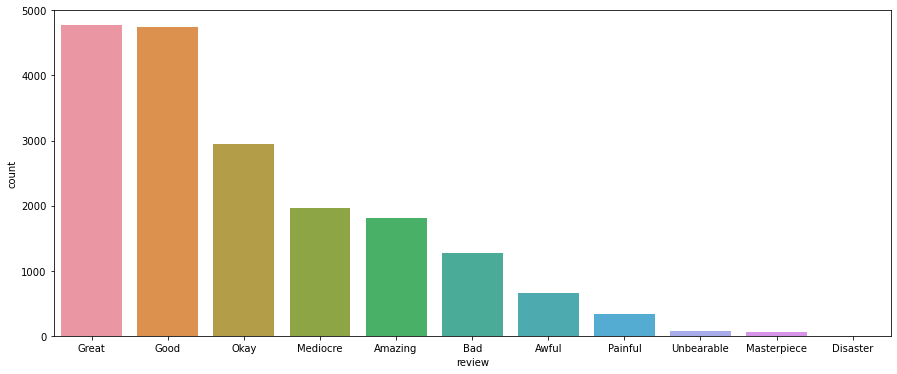

In [101]:
score_phrase = df.score_phrase.value_counts().reset_index()
score_phrase.rename(columns={'index':'review','score_phrase':'count'}, inplace=True)
score_phrase['percent'] = (score_phrase['count']/18625)*100
plt.figure(figsize=(15,6))
sns.barplot(x=score_phrase['review'], y=score_phrase['count'], data=score_phrase)

### Observations
• Most of the available games have great score phrase.

• Approximately 50% of games have a Great and Good score.

• Very few games have Disastrous, Unbearable and Masterpiece score.

# Release Date and Time

### Number of games released in each year.

<AxesSubplot:xlabel='year', ylabel='count'>

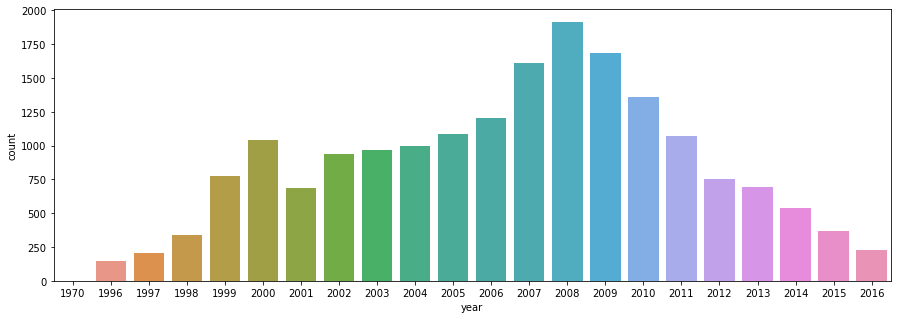

In [102]:
release_year = df.release_year.value_counts().reset_index()
release_year.rename(columns={'index':'year', 'release_year':'count'}, inplace=True)
release_year.sort_values(by='year', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='year', y='count', data=release_year) 

### Observations
• Most games are released in year 2008 followed by 2009.

• In 90's, gaming community was not that much active.

• From 2001 to 2008, there is constant rise in releasing number of games.

### Number of games released in each month.

<AxesSubplot:xlabel='release_months', ylabel='count'>

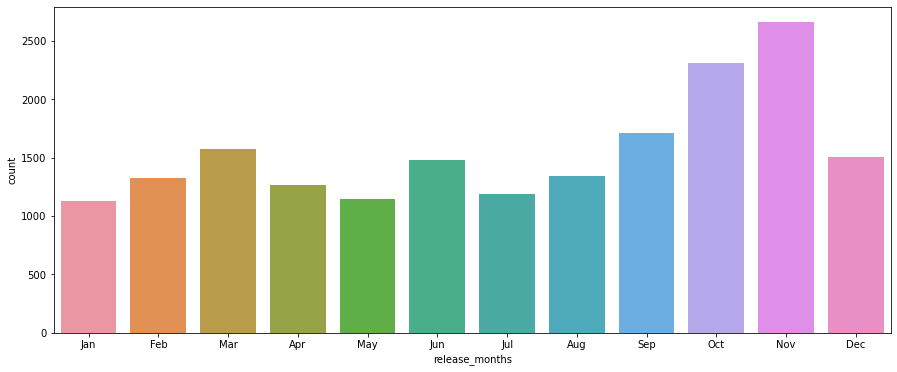

In [103]:
release_month = df.release_month.value_counts().reset_index()
release_month.rename(columns={'index':'release_months','release_month':'count'}, inplace=True)
release_month.sort_values(by='release_months', ascending=True, inplace=True)
release_month.release_months = release_month.release_months.apply(lambda x: calendar.month_abbr[x])
plt.figure(figsize=(15,6))
sns.barplot(x='release_months', y='count', data=release_month)

### Observations
• Most games are released in November followed by October.

• In January, May and July, less number of games are released.


### Number of games released on the days of month

<AxesSubplot:xlabel='day', ylabel='count'>

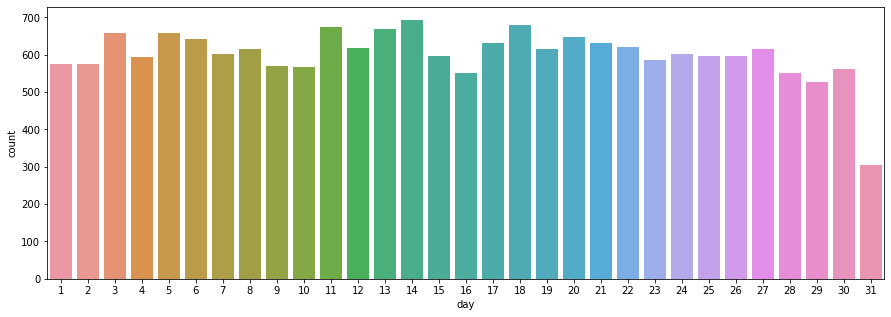

In [104]:
release_day = df.release_day.value_counts().reset_index()
release_day.rename(columns={'index': 'day', 'release_day': 'count'}, inplace=True)
release_day.sort_values(by='day', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='day', y='count', data=release_day)

## Platforms

### Total counts of top 10 platforms

<AxesSubplot:ylabel='platform'>

<Figure size 936x288 with 0 Axes>

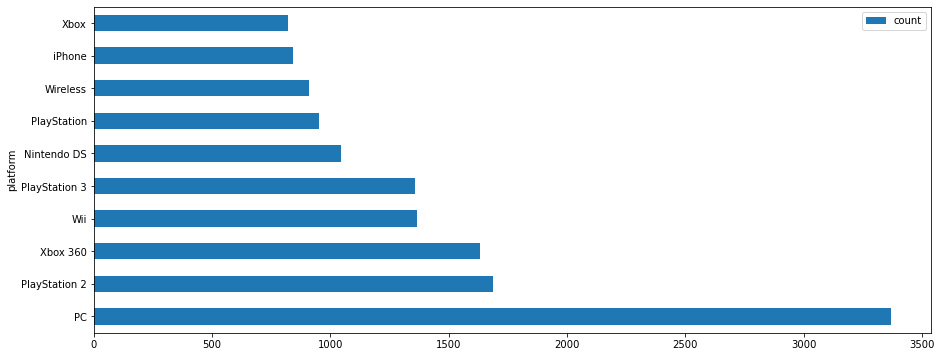

In [105]:
platform = df.platform.value_counts().reset_index()
platform.rename(columns={'index':'platform', 'platform':'count'}, inplace=True)
platform.sort_values(by='count', ascending=False, inplace=True)
plt.figure(figsize=(13,4))
platform[0:10].plot(x='platform', y='count', kind='barh', figsize=(15,6))

### Observations
• As always, most of the games were released for PC platform.

• Playstation 2 seems to be more famous than Playstation 3.

• On XBox, very less number of games are available.


### Showing genres with respect to top trending platforms.

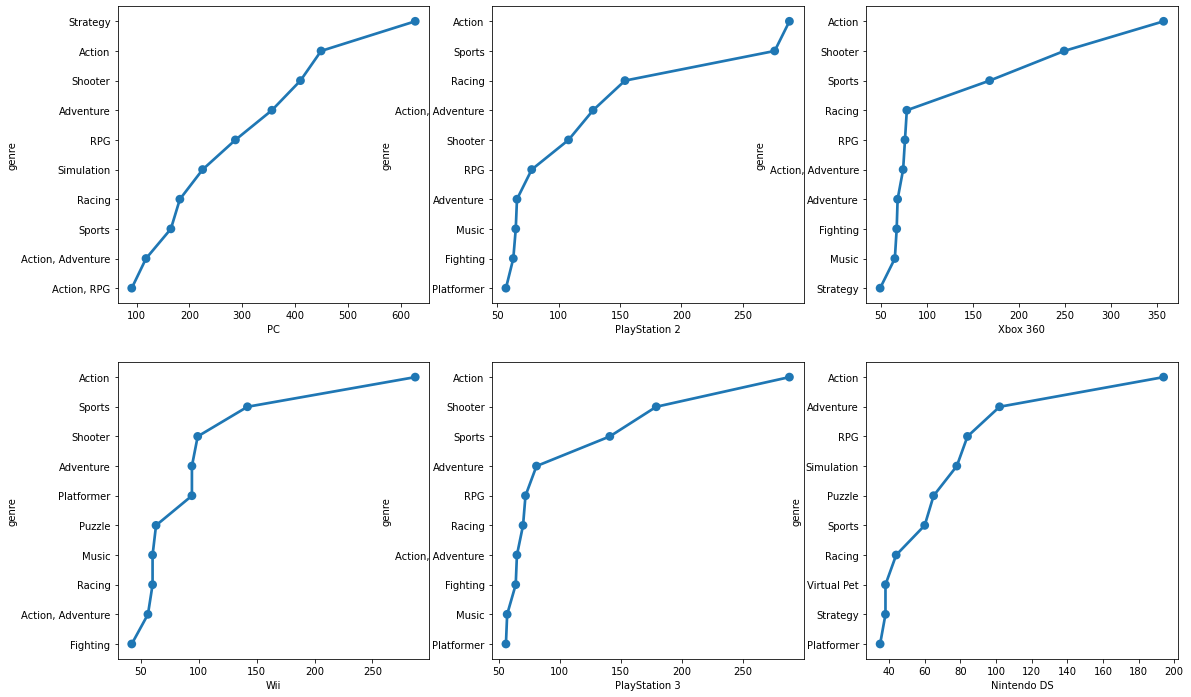

In [106]:
plt.figure(figsize=(19,12))
length_of_rows = 2
length_of_columns = 3
platform_genres = ['PC', 'PlayStation 2', 'Xbox 360', 'Wii', 'PlayStation 3', 'Nintendo DS']
for i in range(len(platform_genres)):
    genre_plat = df.groupby(['platform','genre']).size().reset_index()
    genre_plat.rename(columns={0:'count'}, inplace=True)
    genre_plat = genre_plat[genre_plat['platform'] == platform_genres[i]].sort_values(by='count', ascending=False)[:10]
    plt.subplot(length_of_rows, length_of_columns, i+1)
    sns.pointplot(y=genre_plat['genre'], x=genre_plat['count'])
    plt.xlabel(platform_genres[i])
plt.show()

### Observations
• Pc is famous for strategy games like Age of Empires, World of Warcraft. And then comes action games.

• All platforms are mostly used by gamers to play action games.

### Showing top five genres with respect to each score phrases

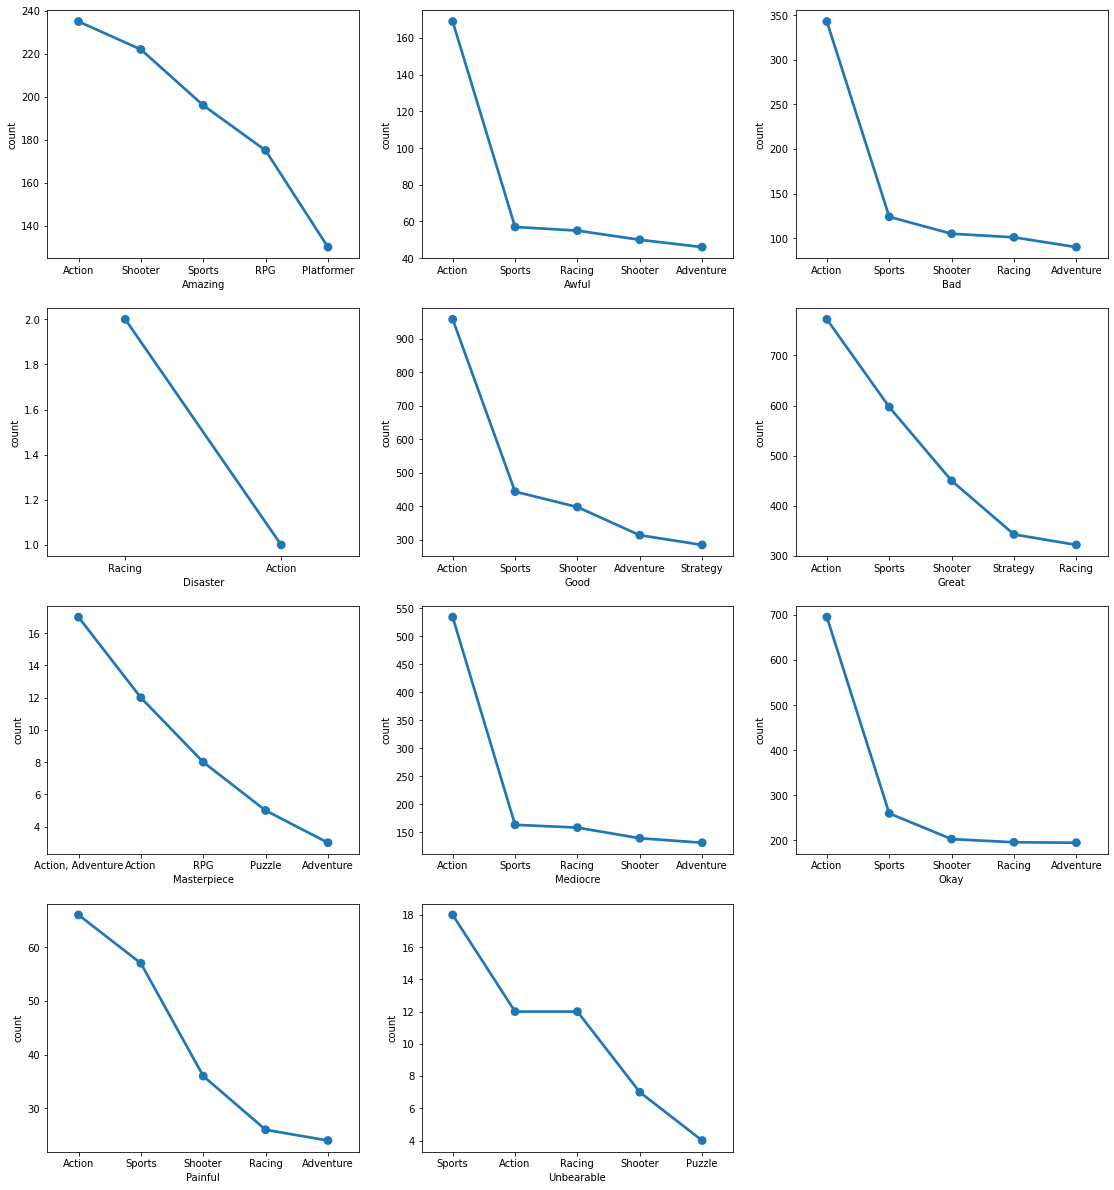

In [107]:
plt.figure(figsize=(19,21))
length_of_rows = 4
length_of_columns = 3
reviews = ['Amazing', 'Awful', 'Bad', 'Disaster', 'Good', 'Great', 'Masterpiece', 'Mediocre', 'Okay', 'Painful', 'Unbearable']
for i in range(len(reviews)):
    gp = df.groupby(['score_phrase','genre']).size().reset_index().sort_values(by=0, ascending=False).rename(columns={0:'count'})
    gp = gp[gp['score_phrase'] == reviews[i]][:5]
    plt.subplot(length_of_rows, length_of_columns, i+1)
    sns.pointplot(x=gp['genre'], y=gp['count'])
    plt.xlabel(reviews[i])
plt.show()

# Conclusion
If you are using PC platform and you have innate liking for action games then you are more likely to be lucky (more better games to play) and will have best gaming experience.

There are still a lot of combinations we can try. I have just tried to put forward some of many things. I hope this notebook has been interesting and useful.

Using this dataset, we found out about 20 years of IGN game releases, their popular platforms, scintillating details about game scoring, genres and much more. Thank you for watching!